<a href="https://colab.research.google.com/github/dr-song-summer-project/ChatBot_Preprocessing/blob/main/AI/Answer_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openpyxl

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


# 답변 Clustering 

In [ ]:
sse = []

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

path = '/gdrive/My Drive/Colab Notebooks/Src/형태소분석_요약_800.xlsx'

df = pd.read_excel(path)
data = pd.DataFrame()
data['annotation_Q'] = df['질문 요약']

def preprocessing(sentence):
    sentence =re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', sentence)
    return sentence

df['content_cleaned'] = data['annotation_Q'].apply(preprocessing)
content = df['content_cleaned'].tolist()

# CountVectrizer로 토큰화
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(content)

# l2 정규화
X = normalize(X)

# 군집화 할 그룹의 갯수 정의
n_clusters = 7

# k-means 알고리즘 적용
kmeans = KMeans(n_clusters=n_clusters).fit(X)

# trained labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# labels에 merge
df['labels'] = labels

df.loc[df['labels']==1,['content_cleaned', 'labels']]

,content_cleaned,labels
9,사후 피임약 생리 전 복용하다 생리 시작햇 그냥 피임약 복용 무리 엄나,1
12,생리 끝나다 않다 질문 드리다 약 다시 끊다 하다,1
15,휴약 기간 생리 기간 상관없이 그냥 먹다 되다,1
21,생리 시작 후 일주일 전 먹다 효과 백프로 인,1
38,사 후 피임약 생리 같 부정 출혈 보이다 않다 휴약기 생리 하다 사후 피임약 부정 ...,1
...,...,...
790,만약 생리 기간 배란기 항생제 복용하다 되다 관계없이 일주일 정도 조심하다 안심하다...,1
798,생리 시작하다 일주 일 동안 계속 조금 피 나오다 임약 먹다 방법 말다 호르몬 균형...,1
809,피임약 가다 임기 계산 생리 주 불 규칙하다 사람 계산하다 있다 것,1
818,노레 보정 열흘 전 쯤 먹다 예정일 생리 일 간 후 관계 가지다 부정 출혈 심하,1


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44079 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

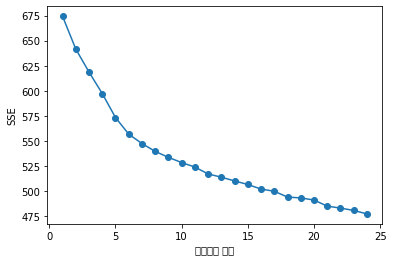

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
sse = []
def elbow(X, n):
  for i in range(1, n+5):
    km = KMeans(n_clusters=i, init='k-means++', random_state=0)
    km.fit(X)
    sse.append(km.inertia_)
  plt.plot(range(1, n+5), sse, marker='o')
  plt.xlabel('클러스터 갯수')
  plt.ylabel('SSE')
  plt.show()

n = 20
elbow(X, n)




In [ ]:
df_clustering = df[['질문', 'content_cleaned', 'labels']]

# df.to_excel("/content/clusted_all.xlsx", sheet_name="질문 포함")
# df_clustering.to_excel("/content/clustered_answer.xlsx", sheet_name="답변 클러스터링")

with pd.ExcelWriter('/content/clustered.xlsx') as writer:
    df_clustering.to_excel(writer, sheet_name='clustered_question')
    df.to_excel(writer, sheet_name='clusted_all')



In [ ]:
with pd.ExcelWriter('/content/clustered_종류.xlsx') as writer:  
  for i in range(0, n_clusters):
    df_sample = df.loc[df['labels']==i,['질문','content_cleaned', 'labels']]
    df_sample.to_excel(writer, sheet_name='Label 1')

# 요약 답변 클러스터링

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

path = '/gdrive/My Drive/Colab Notebooks/Src/sample_annotation.xlsx'

df = pd.read_excel(path)
data = pd.DataFrame()
data['answers'] = df['질문 요약']

def preprocessing(sentence):
    sentence =re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', sentence)
    return sentence

df['content_cleaned'] = data['answers'].apply(preprocessing)
content = df['content_cleaned'].tolist()

# CountVectrizer로 토큰화
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(content)

# l2 정규화
X = normalize(X)

# 군집화 할 그룹의 갯수 정의
n_clusters = 2

# k-means 알고리즘 적용
kmeans = KMeans(n_clusters=n_clusters).fit(X)

# trained labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# labels에 merge
df['labels'] = labels

df.loc[df['labels']==1,['content_cleaned', 'labels']]

,content_cleaned,labels
1,휴약기를 가 지지 않아도 피임 효과가 있나요,1
4,일에서 일까지 피임약을 복용하고 일째 만 다른 피임법을 병용 한다면 이전에...,1
6,휴약 기간을 가진 후에 오늘부터 다시 피임약을 먹고 있습니다 그러면 지금은 피임 효...,1
7,피임약 생리 첫날에 복용할 경우 팩 다 먹고 난 뒤부터 만 피임 효과가 발생하는 ...,1
8,생리 시작 후 일주일이 지나기 전에 먹어도 효과가 백프로 있나요,1
...,...,...
191,약을 피임약과 함께 복용하여도 피임 효과에는 지장이 없는지,1
193,구토을 하면 약이 흡수되지 않아서 피임 효과 없다는데 임신 가능성 있을까요,1
194,미루는 목적으로 경구 피임약을 먹을 땐 생리 시작일 일 이내 부터 약을 먹으라고 ...,1
195,생리 미루는 목적으로 피임약을 먹으려는데요 몇일 전쯤 먹어야 효과가 있나요,1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# X= -2 * np.random.rand(100,2)
# X1 = 1 + 2 * np.random.rand(50,2)
# X[50:100, :] = X1

kmeans = KMeans(n_clusters=n_clusters).fit(X)

kmeans.cluster_centers_


array([[0.00293704, 0.00153382, 0.00321736, ..., 0.00400676, 0.        ,
        0.00143885],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00463864,
        0.        ]])

In [ ]:
df_clustering = df[['content_cleaned', 'labels']]

# df.to_excel("/content/clusted_all.xlsx", sheet_name="질문 포함")
# df_clustering.to_excel("/content/clustered_answer.xlsx", sheet_name="답변 클러스터링")

with pd.ExcelWriter('/content/clustered_annotation.xlsx') as writer:
    df_clustering.to_excel(writer, sheet_name='clustered_answer')
    df.to_excel(writer, sheet_name='clusted_all')


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44079 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

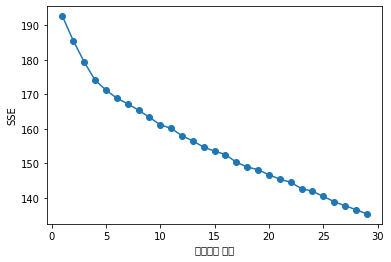

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

smaple = []

def elbow(X, n):
  for i in range(1, n):
    km = KMeans(n_clusters=i, init='k-means++', random_state=0)
    km.fit(X)
    smaple.append(km.inertia_)
  plt.plot(range(1, n), smaple, marker='o')
  plt.xlabel('클러스터 갯수')
  plt.ylabel('SSE')
  plt.show()

elbow(X, 30)